In [6]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [7]:
try:
    notebook_path = os.path.abspath('')
except NameError:
    notebook_path = os.getcwd()
project_root = os.path.abspath(os.path.join(notebook_path, '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(f"Project root added to sys.path: {project_root}")
print("Current sys.path:")
for p in sys.path:
    print(f"  {p}")

# Download NLTK stopwords (if not already downloaded)
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Import clean_text from your src module
from src.preprocess import clean_text

if 'clean_text' in locals() and callable(clean_text):
    print("clean_text is callable and loaded successfully.")
else:
    print("Error: clean_text is not defined or not callable after import.")


Project root added to sys.path: c:\Users\asus\OneDrive\Desktop\projects\spam_classifier
Current sys.path:
  c:\Users\asus\OneDrive\Desktop\projects\spam_classifier
  c:\Users\asus\anaconda3\python313.zip
  c:\Users\asus\anaconda3\DLLs
  c:\Users\asus\anaconda3\Lib
  c:\Users\asus\anaconda3
  
  c:\Users\asus\anaconda3\Lib\site-packages
  c:\Users\asus\anaconda3\Lib\site-packages\win32
  c:\Users\asus\anaconda3\Lib\site-packages\win32\lib
  c:\Users\asus\anaconda3\Lib\site-packages\Pythonwin
clean_text is callable and loaded successfully.


In [8]:
data_path = os.path.join(project_root, 'data', 'spam.csv')
df = pd.read_csv(data_path, sep='\t', header=None, names=['label', 'message'])

In [9]:
print(df.head())

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


C:\Users\asus\AppData\Local\Temp\ipykernel_30592\883992361.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette = 'viridis')


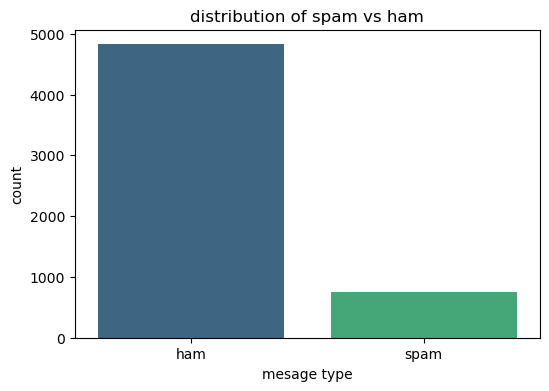

In [11]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=df, palette = 'viridis')
plt.title("distribution of spam vs ham")
plt.xlabel("mesage type")
plt.ylabel("count")
plt.show()